# EDA SQUAD Dataset

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = None

with open("../../datasets/squad/data/train-v1.1.json") as json_data_file:
    data = json.load(json_data_file)

### JSON to CSV file

In [36]:
with open("../../datasets/squad/data/train-v1.1.csv", "w") as csv_file:
    
    csv_file.write("id¬title¬context¬question¬answers\n")

    for _ in data["data"]:

        title = _["title"]
        paragraphs = _["paragraphs"]

        for paragraph in paragraphs:

            context = paragraph["context"]
            qas = paragraph["qas"]

            for qa in qas:

                id_ = qa["id"] 
                answers = str(qa["answers"])
                question = qa["question"]

                row = "{id_}¬{title}¬{context}¬{question}¬{answers}\n".format(id_=id_,
                                                                            title=title,
                                                                            context=context,
                                                                            question=question,
                                                                            answers=answers)
                csv_file.write(row)


After parsing there were some issues with the JSON file to consider. There is a row with 25k blank spaces I removed manually, also many texts had new line characters (\n) so, the result had many lines cut off. I used the following regex on a text editor to remove them easier.

^(?!5[\da-z]+¬).*

### CSV to Dataframe

In [56]:
csv_file_dir = "../../datasets/squad/data/train-v1.1.csv"

df = pd.read_csv(csv_file_dir, sep="¬", engine="python", doublequote=False)
df

,id,title,context,question,answers
0,5733be284776f41900661182,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",To whom did the Virgin Mary allegedly appear i...,"[{'answer_start': 515, 'text': 'Saint Bernadet..."
1,5733be284776f4190066117f,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is in front of the Notre Dame Main Building?,"[{'answer_start': 188, 'text': 'a copper statu..."
2,5733be284776f41900661180,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",The Basilica of the Sacred heart at Notre Dame...,"[{'answer_start': 279, 'text': 'the Main Build..."
3,5733be284776f41900661181,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What is the Grotto at Notre Dame?,"[{'answer_start': 381, 'text': 'a Marian place..."
4,5733be284776f4190066117e,University_of_Notre_Dame,"Architecturally, the school has a Catholic cha...",What sits on top of the Main Building at Notre...,"[{'answer_start': 92, 'text': 'a golden statue..."
...,...,...,...,...,...
87594,5735d259012e2f140011a09d,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,"[{'answer_start': 229, 'text': 'Oregon'}]"
87595,5735d259012e2f140011a09e,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,"[{'answer_start': 414, 'text': 'Rangoon'}]"
87596,5735d259012e2f140011a09f,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,"[{'answer_start': 476, 'text': 'Minsk'}]"
87597,5735d259012e2f140011a0a0,Kathmandu,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,"[{'answer_start': 199, 'text': '1975'}]"


### Distribution of the n° of characters in "context" field

array([[<AxesSubplot:title={'center':"Distribution of n° of characters of 'context'"}>]],
      dtype=object)

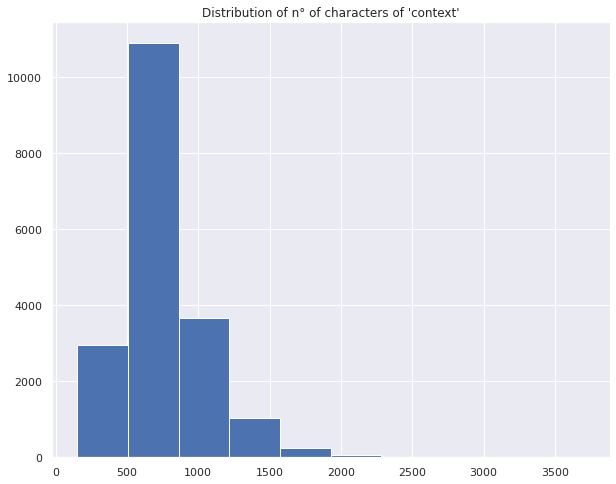

In [57]:
unique_ctx = pd.Series(df["context"].unique(), name="context").to_frame()
unique_ctx
chars_per_ctx = pd.Series(unique_ctx["context"].str.len(), name="Distribution of n° of characters of 'context'").to_frame()
chars_per_ctx.hist()

In [58]:
chars_per_ctx.describe()

,Distribution of n° of characters of 'context'
count,18892.000000
mean,735.857982
std,309.951283
min,151.000000
25%,547.000000
50%,678.000000
75%,877.000000
max,3706.000000


### Distribution of n° of characters in "question" field

array([[<AxesSubplot:title={'center':"Distribution of characters of 'question'"}>]],
      dtype=object)

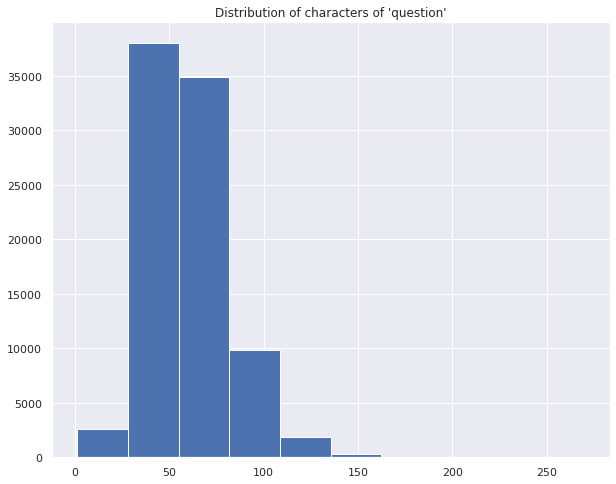

In [59]:
chars_per_qtn = pd.Series(df["question"].str.len(), name="Distribution of characters of 'question'").to_frame()
chars_per_qtn.hist()

In [60]:
chars_per_qtn.describe()

,Distribution of characters of 'question'
count,87599.000000
mean,59.278348
std,21.198555
min,1.000000
25%,44.000000
50%,56.000000
75%,71.000000
max,270.000000


### Frequency of n° of words in "context" field

Defining function to preprocess corpus to obtain word frequency

In [61]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from collections import Counter

stop = list(set(stopwords.words("english")))

def preproc_freq_word_corpus(feature: pd.Series):
    _data = feature.unique()
    _corpus = []

    for i in _data:
        text = re.sub(r"[^a-z\s]", "", str(i).lower())
        tokens = word_tokenize(text)
        for token in tokens:
            if len(token) > 2 and token not in stop:
                _corpus.append(token)
    return _corpus

[Text(0.5, 1.0, "Word Frequency in 'context'")]

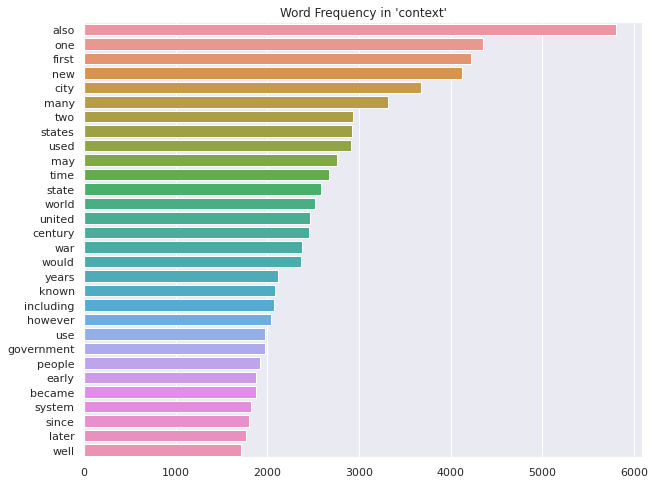

In [62]:
ctx_corpus = preproc_freq_word_corpus(feature=df["context"])

counter = Counter(ctx_corpus)

most=counter.most_common()

x, y = [], []

for word, count in most[:30]:
    x.append(word)
    y.append(count)

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Word Frequency in 'context'")

### Frequency of n° of words in "question" field

[Text(0.5, 1.0, "Word Frequency in 'question'")]

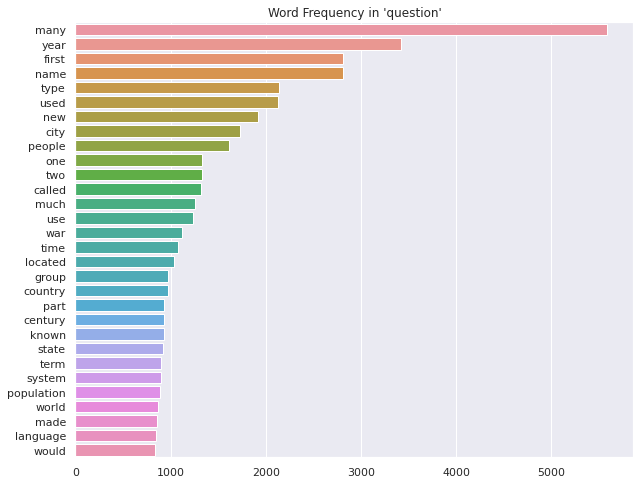

In [63]:
qtn_corpus = preproc_freq_word_corpus(feature=df["question"])

counter = Counter(qtn_corpus)

most=counter.most_common()

x, y = [], []

for word, count in most[:30]:
    x.append(word)
    y.append(count)

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Word Frequency in 'question'")

### Ngram exploration

Defining function to get ngrams from a courpus using Bag of Words to count the frequency.

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key= lambda x: x[1], reverse=True)
    return words_freq[:10]

Defining function to preprocess text from a dataset feature.

In [65]:
def preproc_corpus(feature: pd.Series):
    _data = feature.unique()
    _corpus = []

    for i in _data:
        text = re.sub(r"[^a-z\s]", "", str(i).lower())
        tokens = word_tokenize(text)
        tokens_no_stop = []
        for token in tokens:
            if len(token) > 2 and token not in stop:
                tokens_no_stop.append(token)
        _corpus.append(" ".join(tokens_no_stop))

    return _corpus

#### Bigrams from 'context' field

In [66]:
ctx_corpus = preproc_corpus(feature=df["context"])
top_n_bigrams = get_top_ngram(corpus=ctx_corpus, n=2)

[Text(0.5, 1.0, "Top Bigrams from 'context' field")]

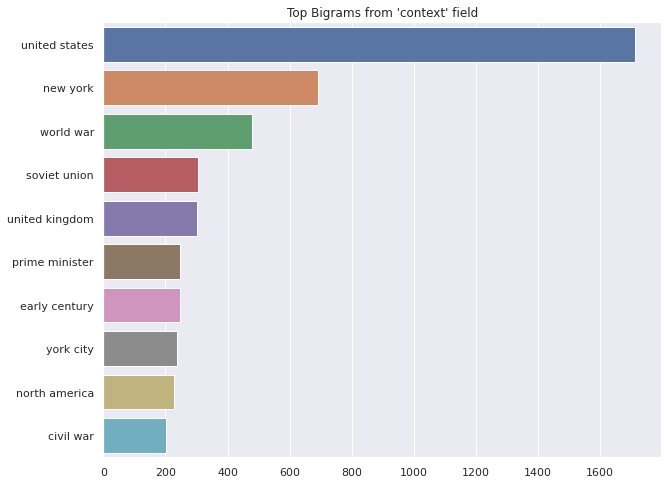

In [67]:
x, y = map(list, zip(*top_n_bigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Bigrams from 'context' field")

#### Bigrams from 'question' field

In [68]:
qtn_corpus = preproc_corpus(feature=df["question"])
top_n_bigrams = get_top_ngram(corpus=qtn_corpus, n=2)

[Text(0.5, 1.0, "Top Bigrams from 'question' field")]

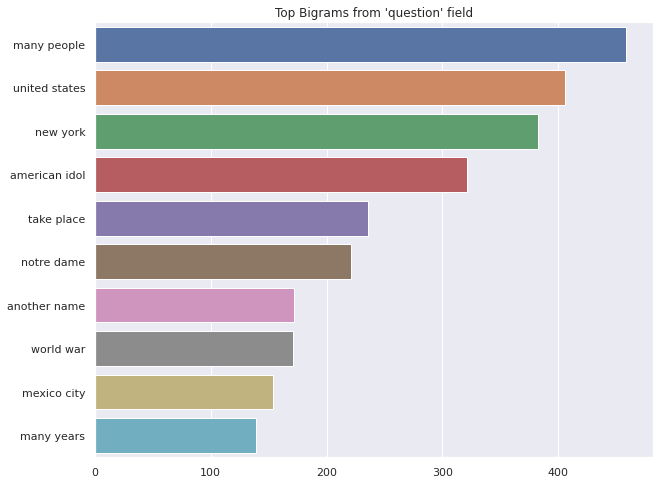

In [69]:
x, y = map(list, zip(*top_n_bigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Bigrams from 'question' field")

#### Trigrams from 'context' field

In [70]:
ctx_corpus = preproc_corpus(feature=df["context"])
top_n_bigrams = get_top_ngram(corpus=ctx_corpus, n=3)

[Text(0.5, 1.0, "Top Trigrams from 'context' field")]

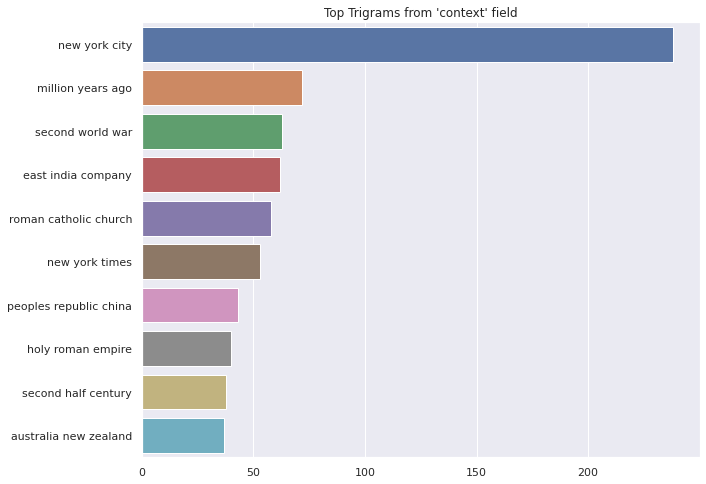

In [71]:
x, y = map(list, zip(*top_n_bigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Trigrams from 'context' field")

#### Trigrams from 'question' field

In [72]:
ctx_corpus = preproc_corpus(feature=df["question"])
top_n_bigrams = get_top_ngram(corpus=ctx_corpus, n=3)

[Text(0.5, 1.0, "Top Trigrams from 'question' field")]

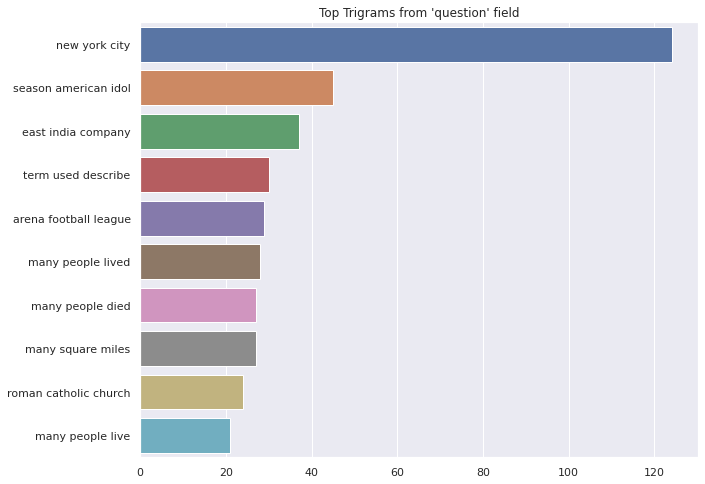

In [73]:
x, y = map(list, zip(*top_n_bigrams))

sns.set(rc={"figure.figsize":(10, 8)})
sns.barplot(x=y, y=x).set(title="Top Trigrams from 'question' field")